# Demo of hierarchical clustering and consensus clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_fuzzy_data
from scipy.spatial import distance
from copy import deepcopy
from timeit import default_timer as timer
from datetime import timedelta
import importlib
%matplotlib inline

In [2]:
from clustertools.models import consensus
from clustertools.models import similarity
from clustertools.models import density
from clustertools.models import distance as cl_dist

In [3]:
fuzzy = load_fuzzy_data()
len(fuzzy)

2309

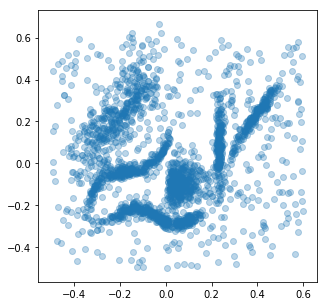

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[:,0], fuzzy[:,1],alpha=.3)

In [5]:
fuzzy_copy = deepcopy(fuzzy)
np.random.shuffle(fuzzy)

Set some parameters

### Hierarchical clustering

Set some parameters

In [6]:
k = 10 # number of clusters to go down to
stop_dist = 0.3
num_stop_crit = 1
stride = 2
data = fuzzy[::stride]
n = len(data) # number of data points
print(n)
link = 'average'
#link = 'complete'
#link = 'single'
metric='euclidean'

1155


Fit hierarchical clustering object and plot results

Hierarchical clustering terminated.
Finished after 0:00:07.552053
Stopping cluster number was reached.
Current number of clusters: 10
Current minimum cluster distance: 0.29


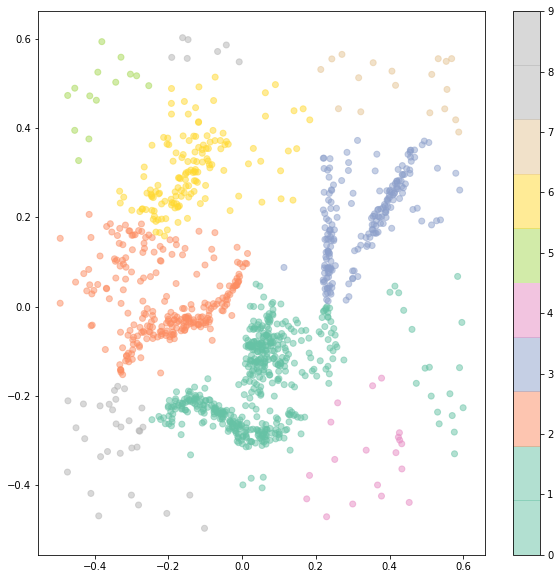

In [7]:
hiercl_obj = similarity.HierarchicalClustering(data, link=link, num_stop_crit=num_stop_crit, metric=metric, k=k, stop_dist=stop_dist)
hiercl_obj.fit()
labels = hiercl_obj.cluster_labels
plt.figure(figsize=(10, 10))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

### Consensus clustering
First fit some other clustering methods

In [8]:
dbscan_obj = density.DBSCAN(data, eps=0.03, minPts=10)
dbscan_obj.fit()
labels = dbscan_obj.cluster_labels
for i in range(len(labels)):
    if labels[i] == 'noise':
        labels[i] = 0
#plt.figure(figsize=(5, 5))
#plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', dbscan_obj._n_clusters), alpha=.5)
#plt.colorbar()

Detected 8 clusters
Finished after 0:00:00.113063
Rate of noise in dataset: 0.279654


In [9]:
kmeans_obj = cl_dist.KMeans(data, 10)
kmeans_obj.fit()
labels = kmeans_obj.cluster_labels
#plt.figure(figsize=(5, 5))
#plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
#plt.colorbar()

terminated by break condition
24 iterations until termination.
Finished after 0:00:00.020201
max within-cluster distance to center: 0.355323
mean within-cluster distance to center: 0.085632
sum of within cluster squared errors: 12.338358


In [10]:
spectral_obj = similarity.SpectralClustering(data, k=10, bandwidth=0.1)
spectral_obj.fit()
labels = spectral_obj.cluster_labels
#plt.figure(figsize=(5, 5))
#plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
#plt.colorbar()

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
11 iterations until termination.
Finished after 0:00:00.032833
max within-cluster distance to center: 0.356145
mean within-cluster distance to center: 0.059845
sum of within cluster squared errors: 7.039632
KMeans terminated. 

Finished after 0:00:14.955818


Set some parameters of consensus

In [11]:
stride = 2
data = fuzzy[::stride]
n = len(data)

#clusterings = [spectral_obj, dbscan_obj, kmeans_obj, hiercl_obj]
clusterings = [spectral_obj, kmeans_obj, hiercl_obj]
#recluster_what = 'clusters'
recluster_what = 'points'
how = 'hierarchical'
#how = 'spectral'
k = 8 # how many clusters to produce

Hierarchical clustering terminated.
Finished after 0:00:05.973631
Stopping cluster number was reached.
Current number of clusters: 8
Current minimum cluster distance: 0.73
Consensus clustering terminated.
Finished after 0:00:06.743603
ANMI (average normalized mutual information) of consensus with clusterings: 0.806


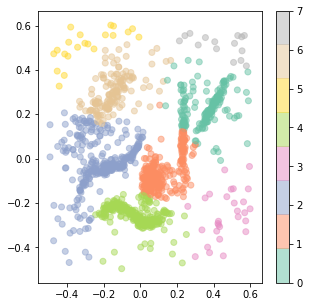

In [12]:
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how)
consensus_obj.fit()
labels = consensus_obj.cluster_labels
plt.figure(figsize=(5, 5))
plt.scatter(fuzzy[::stride,0], fuzzy[::stride,1], c=labels, cmap=plt.get_cmap('Set2', k), alpha=.5)
plt.colorbar()

### Strenth of consensus clustering

Generate data

PUT THIS INTO LOAD-DATA!!

In [13]:
# Generate blobs data with variances not always equal
#from sklearn.datasets import make_blobs
#def different_density_blobs():
#    n_samples = 1500
#    random_state = 3
#    #k=3
#    X, y = make_blobs(n_samples=n_samples, cluster_std=[1.5, 2.5, 2.5], random_state=random_state)
#    data = np.vstack((X[y == 0][:500], X[y == 1][:200], X[y == 2][:200]))
#    return data

In [14]:
#importlib.reload(clustertools.load_data)

In [15]:
from clustertools.load_data import load_spiral_data, scale_data, load_uneven_blobs
#data = load_spiral_data(scale = 'True')
#data = different_density_blobs()
data = load_uneven_blobs()

In [16]:
#import clustertools.load_data

Fit some KMeans and DBSCAN objects

In [17]:
no_labels = [0] * len(data)
num_objects = 5
dbscan_objects = [None] * num_objects
kmeans_objects = [None] * num_objects
dbscan_obj = None
kmeans_obj = None

# Fit some DBSCAN objects
eps_array = np.linspace(0.5, 1.5, num_objects)
minPts_start = 5
minPts_array = np.arange(minPts_start, minPts_start + num_objects)
for i, (eps, minPts) in enumerate(zip(eps_array, minPts_array)):
    dbscan_obj = density.DBSCAN(data, eps=eps, minPts=minPts, verbose=False)
    dbscan_obj.fit()
    dbscan_objects[i] = dbscan_obj

# Fit some KMeans objects
num_clusters_start = 2
num_clusters_array = np.arange(num_clusters_start, num_clusters_start + num_objects)
for i, k in enumerate(num_clusters_array):
    kmeans_obj = cl_dist.KMeans(data, k=k, verbose=False)
    kmeans_obj.fit()
    kmeans_objects[i] = kmeans_obj

Find a consensus

In [18]:
# Fit consensus
clusterings = [*kmeans_objects, *dbscan_objects]
recluster_what = 'points'
how = 'spectral'
k=3
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how, verbose=False)
consensus_labels = consensus_obj.cluster_labels

Plot results

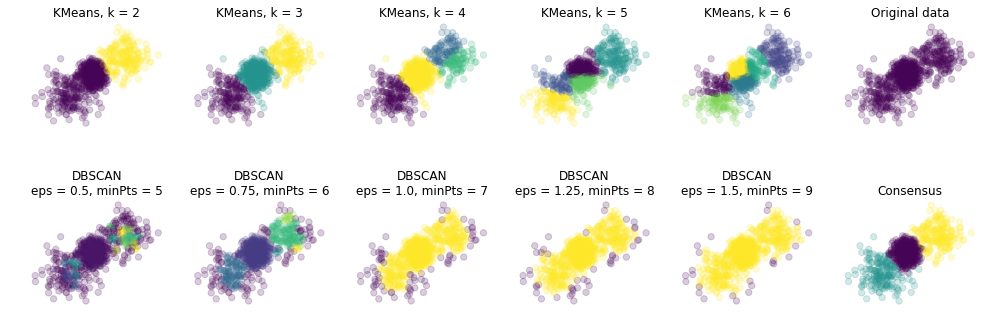

In [19]:
# Put labels in right order in to the labels array
labels = []
for obj in kmeans_objects:
    labels.append(obj.cluster_labels)
labels.append(no_labels)
for obj in dbscan_objects:
    labels.append(consensus_obj._noise_to_zero(obj).cluster_labels)
labels.append(consensus_labels)

# Init plotting arrangement
num_plots = len(kmeans_objects) + len(dbscan_objects) + 2
num_subplts_per_row = 6
num_rows = num_plots // num_subplts_per_row
num_cols = min(num_subplts_per_row, num_plots)
f, axarr = plt.subplots(num_rows,num_cols, figsize=(17, 3*num_rows))

# Plot labels
for i, ax in enumerate(axarr.flat):
    #format_square(ax, min(data[:, 0]), max(data[:, 0]), min(data[:, 1]), max(data[:, 1]))
    ax.set_aspect('equal')
    ax.scatter(data[:, 0], data[:, 1], s=40, c=labels[i], alpha=0.2)
    ax.axis('off')
    if i < num_subplts_per_row - 1:
        ax.set_title('KMeans, k = {0}'.format(num_clusters_array[i]))
    elif i == num_subplts_per_row - 1:
        ax.set_title('Original data')
    elif i < num_plots - 1:
        ax.set_title('DBSCAN\neps = {0}, minPts = {1}'.format(eps_array[i-num_subplts_per_row], minPts_array[i-num_subplts_per_row]))
    else:
        ax.set_title('Consensus')
plt.show()

In [20]:
#f.savefig('consensus_good_kmeans.png', format='png')
# TIGHT LAYOUT!

### Parameter search with consensus clustering

Fit some DBSCAN objects with different parameters (maybe just the 5 ones from above?) and take the one with best consensus. (Plot nice bar diagram for that -> seaborn.) Should work in that case!

In [43]:
importlib.reload(consensus)

<module 'clustertools.models.consensus' from 'C:\\Users\\Johannes\\Desktop\\Uni\\Mathematische Aspekte in ML\\Projekt\\clustertools_project\\clustertools\\models\\consensus.py'>

In [29]:
from clustertools.load_data import load_spiral_data, scale_data
#data = load_spiral_data(scale = 'True')
#data = different_density_blobs()
data = fuzzy
k=8
no_labels = [0] * len(data)
num_objects = 10
dbscan_objects = [None] * num_objects
dbscan_obj = None

# Fit some DBSCAN objects
eps_array = np.linspace(0.01, 0.05, num_objects)
minPts_start = 10
#minPts_array = np.arange(minPts_start, minPts_start + num_objects)
minPts_array = np.ones(num_objects).astype(int) * minPts_start
for i, (eps, minPts) in enumerate(zip(eps_array, minPts_array)):
    dbscan_obj = density.DBSCAN(data, eps=eps, minPts=minPts, verbose=False)
    dbscan_obj.fit()
    dbscan_objects[i] = dbscan_obj
    
# Fit consensus
clusterings = [*dbscan_objects]
recluster_what = 'points'
how = 'spectral'
consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how, verbose=False)
consensus_labels = consensus_obj.cluster_labels

# Calculate NMI's
nmi_array = np.zeros(num_objects)
for i, (obj, nmi) in enumerate(zip(dbscan_objects, nmi_array)):
    nmi_array[i] = consensus_obj.nmi_with_me(consensus_obj._noise_to_zero(obj).cluster_labels)
#nmi_array

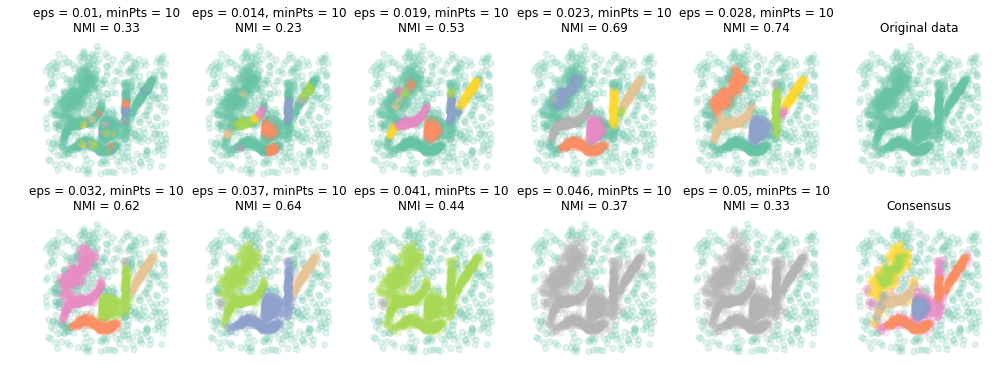

In [30]:
# Put labels in right order in to the labels array
labels = []
for i in range(num_objects // 2):
    labels.append(consensus_obj._noise_to_zero(dbscan_objects[i]).cluster_labels)
labels.append(no_labels)
for i in range(num_objects // 2, num_objects):
    labels.append(consensus_obj._noise_to_zero(dbscan_objects[i]).cluster_labels)
labels.append(consensus_labels)

# Init plotting arrangement
num_plots = len(dbscan_objects) + 2
num_subplts_per_row = 6
num_rows = num_plots // num_subplts_per_row
num_cols = min(num_subplts_per_row, num_plots)
f, axarr = plt.subplots(num_rows,num_cols, figsize=(17, 3*num_rows))

# Plot labels
for i, ax in enumerate(axarr.flat):
    #format_square(ax, min(data[:, 0]), max(data[:, 0]), min(data[:, 1]), max(data[:, 1]))
    ax.set_aspect('equal')
    ax.scatter(data[:, 0], data[:, 1], s=40, c=labels[i], cmap='Set2', alpha=0.2)
    ax.axis('off')
    if i < num_subplts_per_row - 1:
        ax.set_title('eps = {:.2}, minPts = {:}\nNMI = {:.2}'.format(eps_array[i], minPts_array[i], nmi_array[i-1]))
    elif i == num_subplts_per_row - 1:
        ax.set_title('Original data')
    elif i < num_plots - 1:
        ax.set_title('eps = {:.2}, minPts = {:}\nNMI = {:.2}'.format(eps_array[i-1], minPts_array[i-1], nmi_array[i-1]))
    else:
        ax.set_title('Consensus')
plt.show()

In [31]:
f.savefig('consensus_parameter search.png', format='png')

### Which consensus heuristic works best (according to NMI?)

Compare all four consensus heuristics in a 2-by-2-plot, next to their ANMIs (for some example, e.g. the cases above, or fuzzy!)